<a href="https://colab.research.google.com/github/hinton024/Bharat-Intern/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading CSV File from github

In [8]:
wine<-read.csv("https://raw.githubusercontent.com/hinton024/Bharat-Intern/main/Wine%20Quality%20Prediction/winequality.csv")
head(wine)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


## Plotting histogram for quality of wine

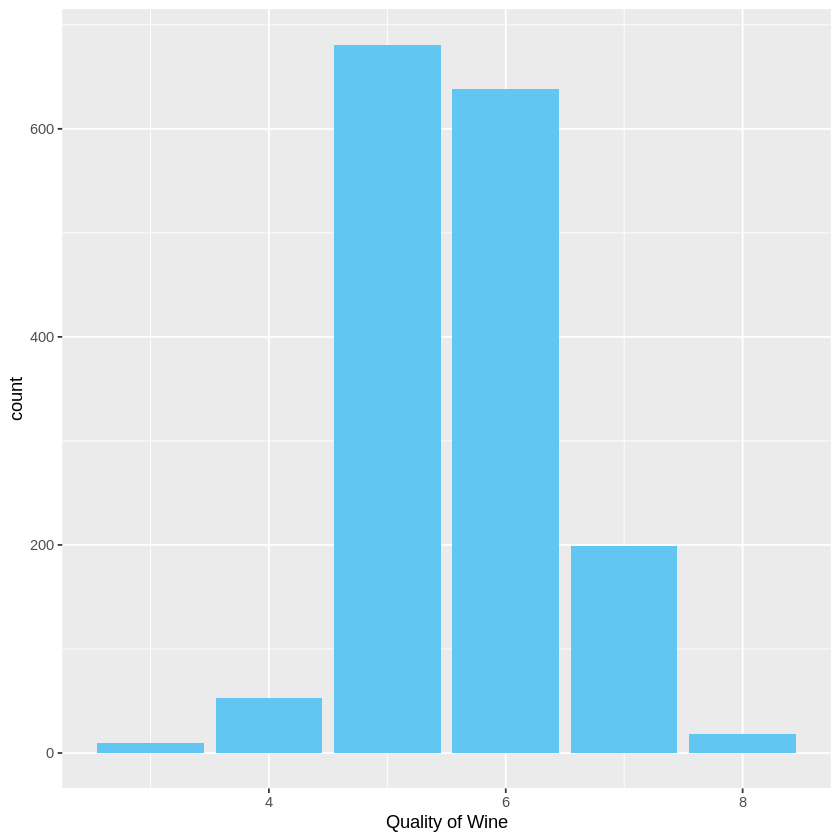

In [15]:
# install.packages("ggplot2")
library(ggplot2)
Y = wine["quality"]

# Histogram for Quality
ggplot(Y, aes(quality)) + labs(x = "Quality of Wine") +
  geom_bar(fill = "#62C6F2")

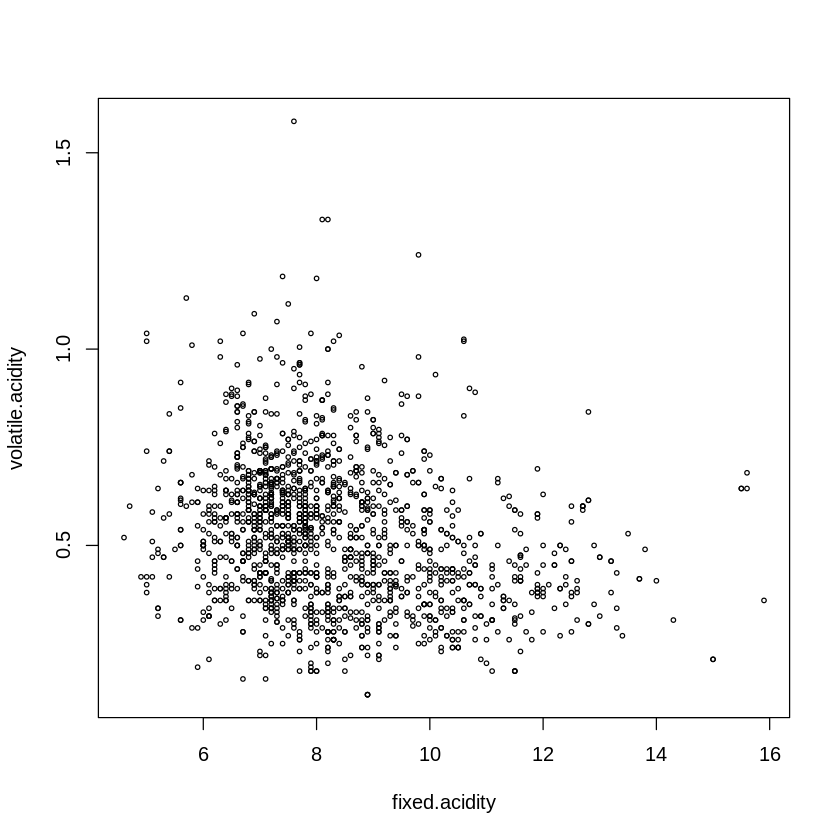

In [16]:
plot(wine$fixed.acidity,wine$volatile.acidity,xlab="fixed.acidity",ylab="volatile.acidity",cex=0.5)


## Finding correlation between different parameters

In [23]:
cr<-cor(wine)
head(cr)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827,0.12405165
volatile.acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803,-0.39055778
citric.acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325,0.22637251
residual.sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544,0.01373164
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054,-0.12890656
free.sulfur.dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835,-0.05065606


## Making a scatterplot matrix to figure out relationship between all the parameters

The following objects are masked from wine (pos = 3):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity


The following objects are masked from wine (pos = 4):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity


The following objects are masked from wine (pos = 5):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity


The following objects are masked from wine (pos = 6):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity


The following objects are masked from wine (pos = 7):

    alcohol, chlorides, citric.acid, dens

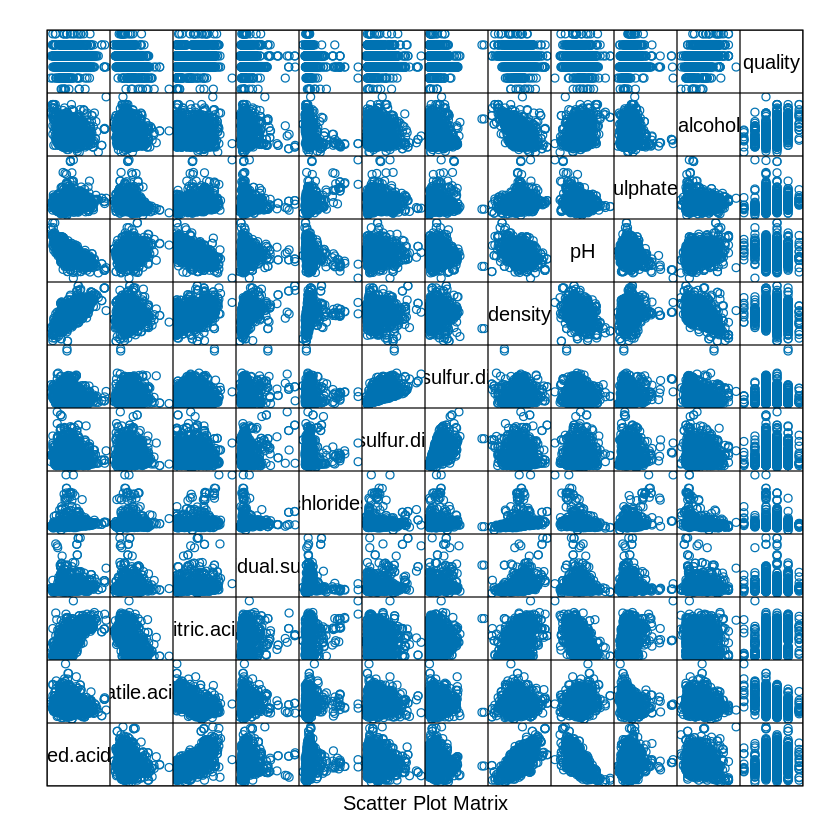

In [25]:
attach(wine)
# library(lattice)
splom(~wine,groups=NULL,data=wine,axis.line.tck=0,axis.text.alpha=0)


## Make Correlation Plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



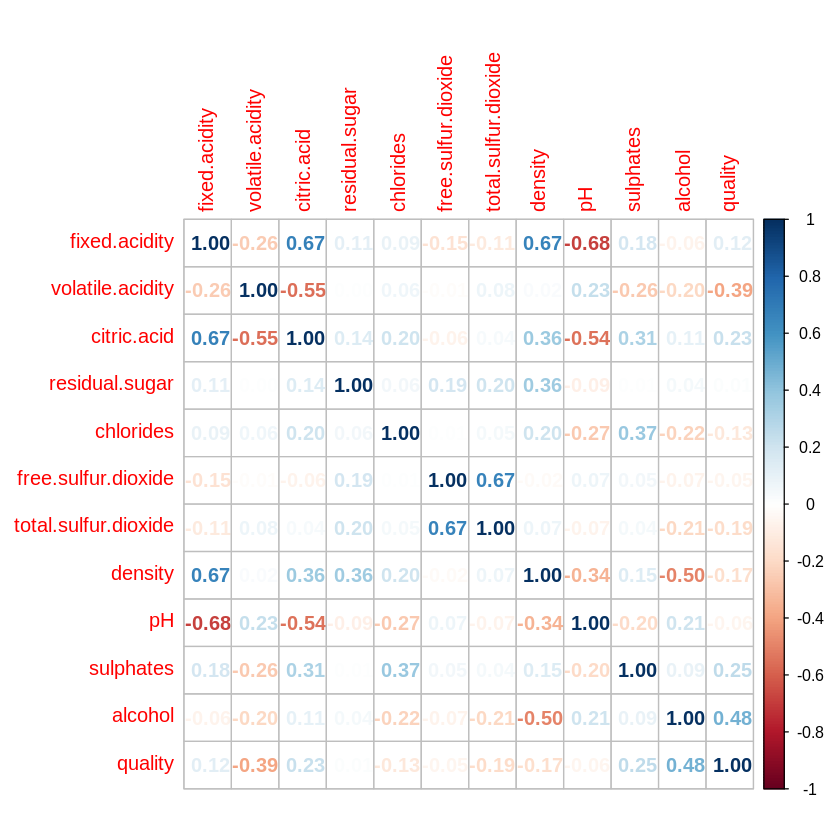

In [26]:
#plot correlation plot
install.packages("corrplot")
library(corrplot)
corrplot(cr,type="full",method="number")# corrplot(cr,method="number")

**Quality is positive related to alcohol, sulphates, citric acid, fixed acidity; Quality is negative related to volatile acidity**

**High correlated variables**

1. Alcohol is negative related to total sulfur dioxide, density and positive related to pH
2. Sulphates is positive related to citric acid, chlorides
3. Citric acid is positive related to fixed acidity, sulphates, density,
4. chlorides, and negative related to pH, volatile acidity
Fixed acidity is positive related to citric acid, density

### Splitting Data into Training and Testing Data

In [28]:
set.seed(2)
install.packages("caTools")
library(caTools)

split<-sample.split(wine$quality,SplitRatio = 0.7)

training<-subset(wine,split==T)
testing<-subset(wine,split==F)
head(training)
head(testing)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
8,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
11,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
16,8.9,0.62,0.19,3.9,0.170,51,148,0.9986,3.17,0.93,9.2,5
17,8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.30,0.75,10.5,7
23,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5


Checking if all the data is numerical to create a model

In [38]:
# install.packages("caret")
library(caret)

numeric_daa<-wine[sapply(wine,is.numeric)]
head(numeric_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Variance Inflation Factor(vif) is the factor to deteremine the extent to which the variance of an estimated regression coefficient is increased due to collinearity (high correlation) with other predictor variables. High VIF values indicate potential multicollinearity, which can affect the model's stability and interpretation.


In [47]:
# install.packages("car")
library(car)

# model<-lm(quality~.-density-fixed.acidity,training)
model<-lm(quality~.-fixed.acidity-volatile.acidity-citric.acid-density-pH,training)
vif(model)


residual.sugar            chlorides  free.sulfur.dioxide 
            1.051644             1.287014             1.843984 
total.sulfur.dioxide            sulphates              alcohol 
            1.950069             1.239163             1.198105

In [48]:
summary(model)



Call:
lm(formula = quality ~ . - fixed.acidity - volatile.acidity - 
    citric.acid - density - pH, data = training)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.69975 -0.36386 -0.04884  0.45885  2.10203 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.9763197  0.2315366   8.536  < 2e-16 ***
residual.sugar        0.0035482  0.0145669   0.244   0.8076    
chlorides            -2.4389581  0.4857009  -5.022 5.97e-07 ***
free.sulfur.dioxide   0.0057022  0.0026203   2.176   0.0298 *  
total.sulfur.dioxide -0.0040345  0.0008987  -4.489 7.90e-06 ***
sulphates             1.3245944  0.1319850  10.036  < 2e-16 ***
alcohol               0.2962010  0.0209360  14.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6747 on 1113 degrees of freedom
Multiple R-squared:  0.307,	Adjusted R-squared:  0.3033 
F-statistic: 82.19 on 6 and 1113 DF,  p-value: < 2.2e-16


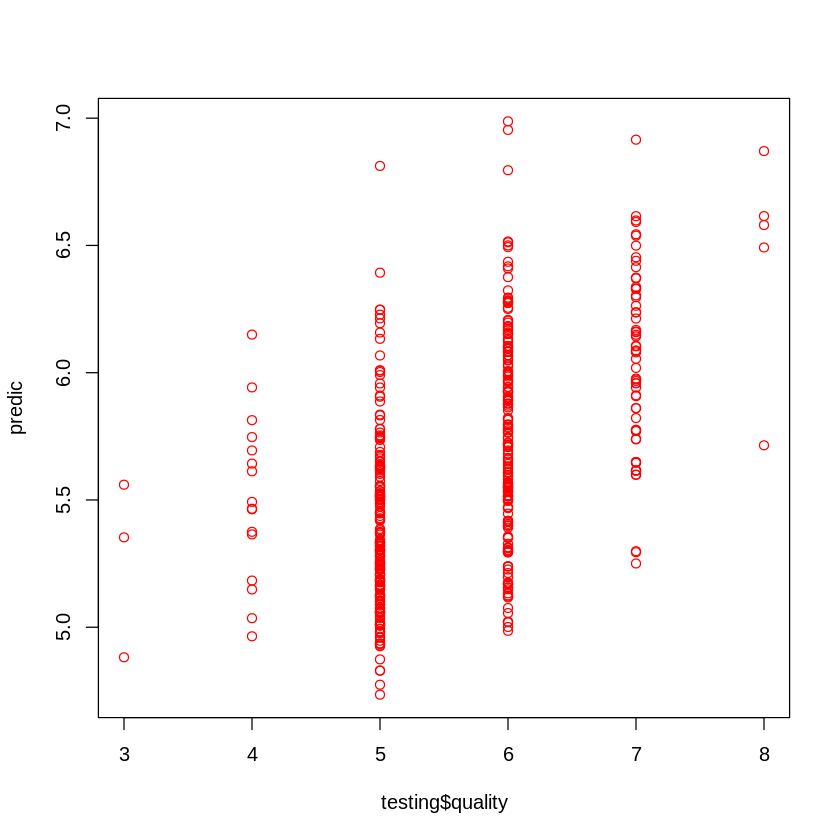

In [54]:
predic<-predict(model,testing)
plot(testing$quality,predic,col="red")
